## Problem Set 3
### Ari Boyarsky

### QR Decomposition

In [5]:
import numpy as np
from scipy import linalg as la 
import matplotlib.pyplot as plt

#### Problem 1

In [32]:
def qr(A):
    m,n = A.shape
    Q = np.copy(A)
    R = np.zeros((n,n))
    for i in range(n):
        R[i,i] = la.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        for j in range(i+1, n):
            R[i,j] = Q[:,j].transpose() @ Q[:,i]
            Q[:,j] = Q[:,j] - (R[i,j]*Q[:,i])
    
    return(Q,R)
        

In [109]:
A = np.random.random((6,4))

In [110]:
Q,R = qr(A)

In [111]:
Q@R

array([[ 0.28442641,  0.63889421,  0.62696786,  0.76534822],
       [ 0.26982692,  0.23213975,  0.82499414,  0.98693881],
       [ 0.33837474,  0.56839771,  0.45986822,  0.42600987],
       [ 0.59799106,  0.64482469,  0.22116214,  0.71088683],
       [ 0.56887705,  0.95986326,  0.58168213,  0.15208608],
       [ 0.74893559,  0.56823948,  0.67266899,  0.04187909]])

In [112]:
Q,R = la.qr(A, mode="economic")

In [113]:
Q

array([[-0.23143831,  0.53688825, -0.2980396 , -0.17258678],
       [-0.21955867, -0.15755731, -0.80328103, -0.32163593],
       [-0.27533616,  0.29690031, -0.06994169, -0.01269607],
       [-0.48658645, -0.11671362,  0.48533386, -0.70860941],
       [-0.46289632,  0.50676591,  0.14607906,  0.41878259],
       [-0.6094103 , -0.57301236, -0.06428143,  0.43485261]])

In [114]:
R

array([[-1.22895132, -1.45970446, -1.23966178, -0.95294734],
       [ 0.        ,  0.56075485,  0.22667923,  0.35199413],
       [ 0.        ,  0.        , -0.73265842, -0.68614716],
       [ 0.        ,  0.        ,  0.        , -0.87677148]])

In [115]:
A

array([[ 0.28442641,  0.63889421,  0.62696786,  0.76534822],
       [ 0.26982692,  0.23213975,  0.82499414,  0.98693881],
       [ 0.33837474,  0.56839771,  0.45986822,  0.42600987],
       [ 0.59799106,  0.64482469,  0.22116214,  0.71088683],
       [ 0.56887705,  0.95986326,  0.58168213,  0.15208608],
       [ 0.74893559,  0.56823948,  0.67266899,  0.04187909]])

#### Problem 2

In [116]:
A = np.random.random((4,4))
def get_det(A):
    m,n = A.shape
    if m != n:
        raise Exception("Error, A must be invertible!")
    Q,R = qr(A)
    return R.diagonal().prod() # one line ;)

In [117]:
np.abs(get_det(A))

0.019256784080945832

In [118]:
np.abs(la.det(A))

0.019256784080945836

#### Problem 3

In [119]:
A = np.random.random((4,4))
b = np.random.random(4)
Q,R = qr(A)

y = Q.transpose() @ b

def backwds_sub(R, y):
    m,n = R.shape
    if m != n:
        raise Exception("Error, A must be invertible!")
    x = np.zeros(n)
    for i in range(n-1,-1,-1):
        s = R[i,i]
        for j in range(n-1,i-1,-1):
            if i == j:
                s = np.dot(R[j,:],x)
                x[i] = (y[i]-s)/R[j,i]
    print(x)

In [120]:
backwds_sub(R,y)

[ 0.85410415 -0.16441501  0.31342219  0.11479127]


In [121]:
la.solve(R,y)

array([ 0.85410415, -0.16441501,  0.31342219,  0.11479127])

#### Problem 4

In [122]:
def householder(A):
    m,n = A.shape
    R = np.copy(A)
    Q = np.eye(m)
    for k in range(n-1):
        u = np.copy(R[k:,k])
        u[0] = u[0] + np.sign(u[0])*la.norm(u)
        u = u/la.norm(u)
        R[k:,k:] = R[k:,k:] - 2 * np.outer(u, (u.T @ R[k:,k:]))
        Q[k:,:] = Q[k:,:] - 2*np.outer(u, (u.T @ Q[k:,:]))
    return(Q.T, R)

In [123]:
A = np.random.random((4,5))
householder(A)

(array([[-0.00252853,  0.71580494,  0.27314092,  0.64265927],
        [-0.20598173,  0.07992611,  0.86201081, -0.45620249],
        [-0.95517314, -0.16890617, -0.09388824,  0.22427656],
        [-0.21262503,  0.67283417, -0.416553  , -0.57320884]]),
 array([[ -6.54928167e-01,  -1.06845381e+00,  -6.00512464e-01,
          -1.12882586e+00,  -1.07595927e+00],
        [  0.00000000e+00,   1.00681371e+00,   9.84267486e-02,
           1.03318321e+00,   8.22732516e-01],
        [  0.00000000e+00,   1.11022302e-16,   1.00586553e-01,
           2.58213534e-01,   5.22820227e-01],
        [  0.00000000e+00,  -1.11022302e-16,   1.73472348e-18,
           1.93516304e-01,  -3.62598483e-01]]))

In [124]:
la.qr(A, mode="economic")

(array([[-0.00252853,  0.71580494,  0.27314092, -0.64265927],
        [-0.20598173,  0.07992611,  0.86201081,  0.45620249],
        [-0.95517314, -0.16890617, -0.09388824, -0.22427656],
        [-0.21262503,  0.67283417, -0.416553  ,  0.57320884]]),
 array([[-0.65492817, -1.06845381, -0.60051246, -1.12882586, -1.07595927],
        [ 0.        ,  1.00681371,  0.09842675,  1.03318321,  0.82273252],
        [ 0.        ,  0.        ,  0.10058655,  0.25821353,  0.52282023],
        [ 0.        ,  0.        ,  0.        , -0.1935163 ,  0.36259848]]))

#### Problem 5

In [125]:
def hessenberg(A):
    m,n = A.shape
    if m != n:
        raise Exception("Error, A must be n x n!")
    H = np.copy(A)
    Q = np.eye(m)
    for k in range(n-3):
        u = np.copy(H[k+1:, k])
        u[0] = u[0] + np.sign(u[0])*la.norm(u)
        u = u/la.norm(u)
        H[1+k:,k:] = H[k+1:, k:] - 2*np.outer(u, (u.T @ H[k+1:, k:]))
        H[:,k+1:] = H[:, k+1:] - 2*np.outer(H[:, k+1:] @ u, u.T)
        Q[1+k:,k:] = Q[k+1:, k:] - 2*np.outer(u, (u.T @ Q[k+1:, k:]))
    return(H, Q.T)

In [126]:
A = np.random.random((4,4))
hessenberg(A)

(array([[  9.29088705e-01,  -1.13267675e+00,   1.24380005e-01,
          -5.71653665e-01],
        [ -6.00954561e-01,   1.31314038e+00,  -4.96863453e-01,
           5.83710157e-01],
        [  0.00000000e+00,  -4.39108566e-01,   2.36528263e-01,
           1.96015710e-02],
        [  1.11022302e-16,   3.77849789e-02,  -6.99551917e-01,
          -7.73750056e-02]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        , -0.28951447, -0.10710808, -0.95116204],
        [ 0.        , -0.10710808,  0.99110352, -0.07900426],
        [ 0.        , -0.95116204, -0.07900426,  0.29841095]]))

### Least Squares and Eigenvalues

#### Problem 1

In [127]:
A = np.random.random((4,5))
Q,R = qr(A)
b = A[:,4]
y = Q.transpose() @ b
backwds_sub(R,y)

[  1.68126812e+15   9.47508962e+15  -1.25503238e+15  -6.37824260e+15
  -6.81944118e+15]


#### Problem 2

In [143]:
housing = np.load("housing.npy")

In [151]:
X = housing[:,0]
y = housing[:,1]

beta = ((X.T @ X)**-1)*(X.T@y)

In [152]:
beta

18.52070104895105

#### Problem 3

In [161]:
vander = np.vander(X, 3+1)
beta = la.lstsq(vander, y)[0]

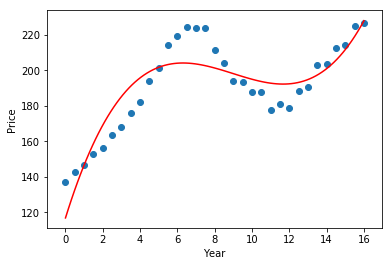

In [162]:
x = np.linspace(0,16,100)
yhat = np.vander(x,3+1) @ beta
plt.plot(x, yhat, 'r')
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

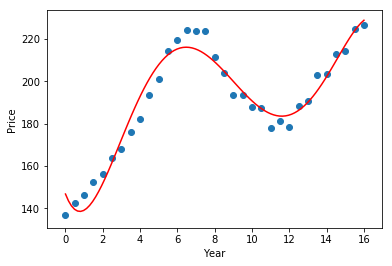

In [157]:
vander = np.vander(X, 6)
beta = la.lstsq(vander, y)[0]
x = np.linspace(0,16,100)
yhat = np.vander(x,6) @ beta
plt.plot(x, yhat, 'r')
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

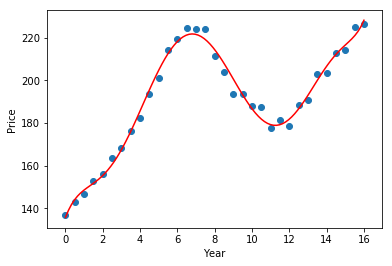

In [163]:
vander = np.vander(X, 9)
beta = la.lstsq(vander, y)[0]
x = np.linspace(0,16,100)
yhat = np.vander(x,9) @ beta
plt.plot(x, yhat, 'r')
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

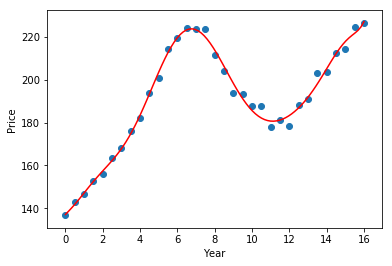

In [164]:
vander = np.vander(X, 12)
beta = la.lstsq(vander, y)[0]
x = np.linspace(0,16,100)
yhat = np.vander(x,12) @ beta
plt.plot(x, yhat, 'r')
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

#### Problem 4

In [165]:
ellipse = np.load("ellipse.npy")

In [169]:
x = ellipse[:,0]
y = ellipse[:,1]

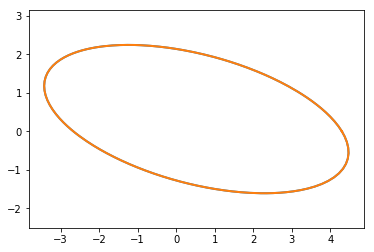

In [8]:
def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")
    plt.show()

x, y = np.load('ellipse.npy').T
w = np.ones(len(x))
z = np.column_stack((x**2, x, x*y, y, y**2)) 
a, b, c, d, e = la.lstsq(z, w)[0]
plot_ellipse(a, b, c, d, e)

#### Problem 5

In [21]:
def prob_5(A, N, tol):
    m,n = A.shape
    x = np.random.rand(n)
    x_0 = x/la.norm(x)
    d = 1e5
    iters = 1
    while d > tol and iters < N:
        d = la.norm(A@x -x)
        x = A@x
        x = x/la.norm(x)
        iters += 1
    return x.T@A@x, x

In [24]:
A = np.random.random((10,10))
eig_val, eig_vec = prob_5(A, 10, 1e-5)

print(eig_val)

5.49293148401


In [28]:
eigs, vecs = la.eig(A)
i=np.argmax(eigs)
eigs[i]

(5.4929314859427611+0j)

#### Problem 6

In [33]:
def hess_precon(A, N):
    m,n = A.shape
    S = la.hessenberg(A)
    for k in range(n):
        Q,R = qr(S)
        S = R@Q
    eigs = []
    i = 0
    while i < N:
        if S.shape == (1,1):
            eigs.append(S[0])
        elif S.shape == (2,2):
            e, v = la.eig(A)
            eigs.append(e)
            i += 1
        i +=1
    return (eigs)

In [35]:
A = np.random.random((10,10))
hess_precon(A, 100)

[]

### SVD

In [1]:
# 1 
def svd(A, tol=0.00001):
    h = A.conj().T
    eigs, vecs = la.eig(h @ A)
    
    sigma =  np.sqrt(eigs).real 
    j = np.argsort(-sigma)
    sigma =  sigma[j]
    vecs = vecs[j, :]
    r = (sigma > tol).sum()
    sigma_1 = sigma[0:r]
    vecs_1 = vecs[:, 0:r]
    u_1 = A @ vecs_1 / sigma_1
    return u_1, sigma_1, vecs_1.conj().T

In [6]:
A = np.random.random((3, 3))
svd(A)

(array([[ 0.55531826,  0.32930565,  9.3762764 ],
        [ 0.59948444, -0.28338807, -1.95419049],
        [ 0.41793296,  0.25017674,  4.28222845]]),
 array([ 1.23224604,  0.5683994 ,  0.06641717]),
 array([[ 0.31307447,  0.49064136,  0.81317614],
        [ 0.93747531, -0.02255654, -0.3473201 ],
        [-0.15206717,  0.8710696 , -0.46702604]]))

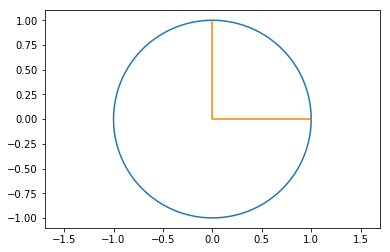

ValueError: shapes (3,3) and (2,200) not aligned: 3 (dim 1) != 2 (dim 0)

In [12]:
# 2 
t = np.linspace(0, 2*np.pi, 200)
cos_t, sin_t = np.cos(t), np.sin(t)
S = np.empty((2, 200))
S[0, :] = cos_t
S[1, :] = sin_t
E  = np.array([[1,0,0],[0,0,1]])
U, s, V = la.svd(A)
sigma = np.diag(s)
plt.plot(S[0,:], S[1,:])
plt.plot(E[0,:], E[1,:])
plt.axis('equal')
plt.show()
plt.plot((V@S)[0,:], (V@S)[1,:])
plt.plot((V@E)[0,:], (V@E)[1,:])
plt.axis('equal')
plt.show()
plt.plot((sigma@V@S)[0,:], (sigma@V@S)[1,:])
plt.plot((sigma@V@E)[0,:], (sigma@V@E)[1,:])
plt.axis('equal')
plt.show()
plt.plot((U@sigma@Vh@S)[0,:], (U@sigma@V@S)[1,:])
plt.plot((U@sigma@V@E)[0,:], (U@sigma@V@E)[1,:])
plt.axis('equal')
plt.show()